In [2]:
from ultralytics import YOLO
import os
import random
import cv2
import numpy as np
import shutil
import supervision as sv
import cv2
import matplotlib.pyplot as plt


/home/mbergst/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
keypoints = {1: (44, 30), 2: (457, 30), 3: (44, 563), 4: (457, 563), 5: (44, 138), 6: (174, 138), 7: (174, 230), 8: (174, 346), 9: (174, 453), 10: (44, 453), 11: (44, 230), 12: (86, 230), 13: (86, 368), 14: (44, 368), 15: (130, 295), 16: (457, 230), 17: (457, 295), 18: (457, 368), 19: (201, 295), 20: (387, 295), 21: (530, 295), 22: (870, 30), 23: (870, 563), 24: (870, 138), 25: (740, 138), 26: (740, 230), 27: (740, 346), 28: (740, 453), 29: (870, 453), 30: (870, 230), 31: (827, 230), 32: (827, 368), 33: (870, 368), 34: (785, 295), 35: (712, 295)}

In [4]:
# Choose dataset 1 or 2:
dataset = 1  # 1 or 2

if dataset == 1:
    data_folder = "1_train-val_1min_aalesund_from_start"
    yaml_file = "yaml_files/keypoint_1.yaml"
    labels = "labels_1"

else:
    data_folder = "2_train-val_1min_after_goal"
    yaml_file = "yaml_files/keypoint_2.yaml"
    labels = "labels_2"

In [2]:
image_src_folder = f'/datasets/tdt4265/other/rbk/{data_folder}/img1'
label_src_folder = f'/work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/{labels}'
image_dest_folder = f'/work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/{data_folder}/images/'
label_dest_folder = f'/work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/{data_folder}/labels/'

from scripts.keypoint_dataset import distribute_files

distribute_files(image_src_folder, label_src_folder, image_dest_folder, label_dest_folder)

In [4]:
# Last inn sist trente modell
# Gjør det ikke bedre virker det som

def find_latest_model_with_best(base_path, type='keypoints'):
    detect_path = os.path.join(base_path, 'runs', type)
    training_sessions = [os.path.join(detect_path, d) for d in os.listdir(detect_path) if os.path.isdir(os.path.join(detect_path, d))]
    
    # Liste for å holde stiene til alle 'best.pt'-filer
    best_model_paths = []

    for session in training_sessions:
        best_model_path = os.path.join(session, 'weights', 'best.pt')
        if os.path.exists(best_model_path):
            best_model_paths.append((best_model_path, os.path.getmtime(best_model_path)))

    if not best_model_paths:
        print("Ingen 'best.pt' fil funnet i noen av treningsøktene.")
        return None
    
    # Sorter basert på modifiseringstid og returner den nyeste
    best_model_paths.sort(key=lambda x: x[1], reverse=True)
    return best_model_paths[0][0]


base_path = '/work/mbergst/TDT4265_Project' 


#model = YOLO(find_latest_model_with_best(base_path, 'keypoints'))
#model = YOLO('yolov8n.pt')


In [5]:
# Gjør det veldig bra på dataset 1
model = YOLO('/work/mbergst/TDT4265_Project/runs/keypoints/train54/weights/best.pt')

In [6]:
results = model.train(data=yaml_file, epochs=50, batch=18, imgsz=(1600, 900), project='/work/mbergst/TDT4265_Project/runs/keypoints')

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24195MiB)
engine/trainer: task=detect, mode=train, model=/work/mbergst/TDT4265_Project/runs/keypoints/train54/weights/best.pt, data=yaml_files/keypoint_1.yaml, epochs=50, time=None, patience=100, batch=18, imgsz=(1600, 900), save=True, save_period=-1, cache=False, device=None, workers=8, project=/work/mbergst/TDT4265_Project/runs/keypoints, name=train78, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fa

train: Scanning /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/labels/train.cache... 1441 images, 0 backgrounds, 150 corrupt: 100%|██████████| 1441/1441 [00:00<?, ?it/s]

train: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/train/000340.jpg: ignoring corrupt image/label: Label class 25 exceeds dataset class count 23. Possible class labels are 0-22
train: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/train/000342.jpg: ignoring corrupt image/label: Label class 25 exceeds dataset class count 23. Possible class labels are 0-22
train: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/train/000343.jpg: ignoring corrupt image/label: Label class 25 exceeds dataset class count 23. Possible class labels are 0-22
train: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/train/000344.jpg: ignoring corrupt image/label: Label class 25 exceeds dataset class count 23. Possible class labels are 0-22
trai


val: Scanning /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/labels/val.cache... 361 images, 0 backgrounds, 37 corrupt: 100%|██████████| 361/361 [00:00<?, ?it/s]

val: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/val/000341.jpg: ignoring corrupt image/label: Label class 25 exceeds dataset class count 23. Possible class labels are 0-22
val: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/val/000351.jpg: ignoring corrupt image/label: Label class 25 exceeds dataset class count 23. Possible class labels are 0-22
val: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/val/000366.jpg: ignoring corrupt image/label: Label class 38 exceeds dataset class count 23. Possible class labels are 0-22
val: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/val/000376.jpg: ignoring corrupt image/label: Label class 38 exceeds dataset class count 23. Possible class labels are 0-22
val: WARNING ⚠️ /wor

Plotting labels to /work/mbergst/TDT4265_Project/runs/keypoints/train78/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00037, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1600 train, 1600 val
Using 8 dataloader workers
Logging results to /work/mbergst/TDT4265_Project/runs/keypoints/train78
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      19.4G      0.926     0.6984     0.9227        276       1600: 100%|██████████| 72/72 [00:17<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.85it/s]

                   all        324       3668      0.987      0.985      0.989      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      16.4G     0.9624     0.6861     0.9322        208       1600: 100%|██████████| 72/72 [00:16<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.91it/s]

                   all        324       3668      0.989      0.987       0.99      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      16.9G     0.9986     0.6785     0.9462        283       1600: 100%|██████████| 72/72 [00:16<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.89it/s]

                   all        324       3668      0.987      0.982      0.989      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      18.2G       1.01     0.6609     0.9434        343       1600: 100%|██████████| 72/72 [00:16<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.98it/s]

                   all        324       3668      0.992      0.985      0.991      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      16.8G     0.9633     0.6301     0.9335        248       1600: 100%|██████████| 72/72 [00:16<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.00it/s]

                   all        324       3668      0.987      0.985      0.991      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      17.4G     0.9646     0.6186      0.932        201       1600: 100%|██████████| 72/72 [00:16<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.96it/s]

                   all        324       3668      0.987      0.986      0.991       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      17.3G     0.9509     0.5996     0.9275        234       1600: 100%|██████████| 72/72 [00:16<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.99it/s]

                   all        324       3668      0.986      0.988      0.992       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      16.6G      0.959     0.5986     0.9317        196       1600: 100%|██████████| 72/72 [00:16<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.06it/s]

                   all        324       3668      0.991      0.986      0.992      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      17.3G      0.925     0.5744     0.9201        211       1600: 100%|██████████| 72/72 [00:16<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.83it/s]

                   all        324       3668      0.988       0.99      0.991      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      17.7G     0.9023     0.5598     0.9107        298       1600: 100%|██████████| 72/72 [00:16<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.83it/s]

                   all        324       3668      0.987       0.99      0.992      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      17.6G      0.912      0.556     0.9204        276       1600: 100%|██████████| 72/72 [00:16<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.96it/s]

                   all        324       3668      0.991      0.989      0.993      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      17.2G      0.898     0.5382     0.9154        232       1600: 100%|██████████| 72/72 [00:16<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.96it/s]

                   all        324       3668      0.992      0.988      0.993      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      16.5G     0.8858     0.5287     0.9082        275       1600: 100%|██████████| 72/72 [00:16<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.91it/s]

                   all        324       3668      0.989      0.986      0.992      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        18G     0.8785      0.517     0.9086        212       1600: 100%|██████████| 72/72 [00:16<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.95it/s]

                   all        324       3668      0.987      0.992      0.992      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      15.9G     0.8798     0.5157     0.9076        316       1600: 100%|██████████| 72/72 [00:16<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.92it/s]

                   all        324       3668      0.987       0.99      0.993      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      16.6G     0.8556     0.4991     0.9036        230       1600: 100%|██████████| 72/72 [00:16<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.07it/s]

                   all        324       3668      0.992      0.988      0.993      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      15.9G      0.836     0.4917      0.894        267       1600: 100%|██████████| 72/72 [00:16<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.01it/s]

                   all        324       3668       0.99      0.989      0.994      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      16.6G     0.8411     0.4881     0.9014        261       1600: 100%|██████████| 72/72 [00:16<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.00it/s]

                   all        324       3668       0.99      0.993      0.994      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      16.6G     0.8147     0.4761     0.8937        259       1600: 100%|██████████| 72/72 [00:16<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.95it/s]

                   all        324       3668      0.988       0.99      0.994      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      17.5G      0.821     0.4777     0.8947        261       1600: 100%|██████████| 72/72 [00:16<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.04it/s]

                   all        324       3668      0.992      0.989      0.994      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      16.9G      0.817     0.4735     0.8903        217       1600: 100%|██████████| 72/72 [00:16<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.98it/s]

                   all        324       3668      0.989       0.99      0.994      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      17.3G     0.8033     0.4646     0.8925        218       1600: 100%|██████████| 72/72 [00:16<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.06it/s]

                   all        324       3668      0.992      0.993      0.994      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      17.3G     0.7981     0.4593     0.8875        272       1600: 100%|██████████| 72/72 [00:16<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.98it/s]

                   all        324       3668      0.992      0.993      0.994      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      17.2G     0.8156     0.4573     0.8876        266       1600: 100%|██████████| 72/72 [00:16<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.03it/s]

                   all        324       3668      0.993      0.992      0.994      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      18.9G     0.7835     0.4481     0.8822        250       1600: 100%|██████████| 72/72 [00:16<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.00it/s]

                   all        324       3668      0.993      0.993      0.994      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      16.7G     0.7519     0.4383     0.8755        240       1600: 100%|██████████| 72/72 [00:16<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.96it/s]

                   all        324       3668      0.993      0.996      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      18.2G     0.7648     0.4436     0.8773        236       1600: 100%|██████████| 72/72 [00:16<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.10it/s]

                   all        324       3668      0.989      0.994      0.994      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      16.5G     0.7621     0.4372     0.8817        278       1600: 100%|██████████| 72/72 [00:16<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.03it/s]

                   all        324       3668       0.99      0.993      0.994      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      16.3G     0.7434     0.4289     0.8714        332       1600: 100%|██████████| 72/72 [00:16<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.01it/s]

                   all        324       3668      0.995      0.993      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      16.9G     0.7349     0.4233     0.8696        325       1600: 100%|██████████| 72/72 [00:16<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.05it/s]

                   all        324       3668      0.991      0.995      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      17.3G     0.7375     0.4235     0.8751        217       1600: 100%|██████████| 72/72 [00:16<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.98it/s]

                   all        324       3668      0.993      0.993      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        18G      0.738     0.4245     0.8714        289       1600: 100%|██████████| 72/72 [00:15<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.61it/s]

                   all        324       3668      0.993      0.988      0.994      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      15.9G     0.7233     0.4166     0.8673        308       1600: 100%|██████████| 72/72 [00:15<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.59it/s]

                   all        324       3668       0.99      0.995      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      16.4G     0.7075     0.4095     0.8629        294       1600: 100%|██████████| 72/72 [00:15<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.55it/s]

                   all        324       3668      0.995      0.996      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      16.7G     0.7114     0.4101     0.8644        278       1600: 100%|██████████| 72/72 [00:15<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.54it/s]

                   all        324       3668      0.993      0.993      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      16.6G     0.7035     0.4049     0.8662        273       1600: 100%|██████████| 72/72 [00:15<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.58it/s]

                   all        324       3668      0.995      0.994      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      15.8G     0.7122     0.4049     0.8633        284       1600: 100%|██████████| 72/72 [00:15<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.53it/s]

                   all        324       3668      0.993      0.995      0.994      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      15.1G      0.687     0.3983      0.857        266       1600: 100%|██████████| 72/72 [00:15<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.61it/s]

                   all        324       3668      0.994      0.994      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      17.2G     0.6862     0.3974     0.8578        315       1600: 100%|██████████| 72/72 [00:15<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.62it/s]

                   all        324       3668      0.995      0.994      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      18.3G     0.6825     0.3929     0.8591        342       1600: 100%|██████████| 72/72 [00:15<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.44it/s]

                   all        324       3668      0.992      0.992      0.995      0.838


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      16.2G      0.708     0.3994     0.8736        129       1600: 100%|██████████| 72/72 [00:16<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.59it/s]

                   all        324       3668      0.994      0.992      0.994      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      15.5G     0.6445     0.3804     0.8585        139       1600: 100%|██████████| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.71it/s]

                   all        324       3668      0.992      0.996      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      15.5G     0.6263     0.3733     0.8517        143       1600: 100%|██████████| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.66it/s]

                   all        324       3668      0.995      0.994      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      15.7G      0.609     0.3662     0.8481        109       1600: 100%|██████████| 72/72 [00:14<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.57it/s]

                   all        324       3668      0.996      0.995      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      15.5G     0.6036     0.3626     0.8448        171       1600: 100%|██████████| 72/72 [00:14<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.63it/s]

                   all        324       3668      0.995      0.994      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      15.5G     0.5914     0.3592     0.8449        120       1600: 100%|██████████| 72/72 [00:14<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.59it/s]

                   all        324       3668      0.992      0.997      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      15.5G      0.588     0.3575     0.8437        133       1600: 100%|██████████| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.56it/s]

                   all        324       3668      0.991      0.997      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      15.5G     0.5791     0.3546      0.843        158       1600: 100%|██████████| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.44it/s]

                   all        324       3668      0.994      0.996      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      15.5G     0.5707     0.3502     0.8379        144       1600: 100%|██████████| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.54it/s]

                   all        324       3668      0.995      0.996      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      15.5G     0.5606     0.3484     0.8382        121       1600: 100%|██████████| 72/72 [00:14<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.76it/s]

                   all        324       3668      0.993      0.997      0.995      0.855



50 epochs completed in 0.241 hours.
Optimizer stripped from /work/mbergst/TDT4265_Project/runs/keypoints/train78/weights/last.pt, 6.4MB
Optimizer stripped from /work/mbergst/TDT4265_Project/runs/keypoints/train78/weights/best.pt, 6.4MB

Validating /work/mbergst/TDT4265_Project/runs/keypoints/train78/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24195MiB)
Model summary (fused): 168 layers, 3010133 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.58it/s]


                   all        324       3668      0.993      0.997      0.995      0.854
                     0        324        211          1      0.999      0.995       0.85
                     1        324        265      0.992          1      0.995      0.888
                     6        324        187      0.997      0.995      0.995      0.803
                     7        324        239      0.998          1      0.995      0.905
                     8        324        230      0.998          1      0.995      0.879
                    10        324        177      0.998          1      0.995      0.848
                    11        324        107          1       0.99      0.995      0.823
                    13        324        166      0.964      0.979      0.992      0.778
                    14        324        177      0.998      0.994      0.995      0.841
                    15        324        101          1       0.99      0.995      0.778
                    1

In [19]:
# Evaluér modellens prestasjon på valideringssettet
val_results = model.val()

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24195MiB)


Model summary (fused): 168 layers, 3010133 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/labels/val.cache... 361 images, 0 backgrounds, 37 corrupt: 100%|██████████| 361/361 [00:00<?, ?it/s]

val: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/val/000341.jpg: ignoring corrupt image/label: Label class 25 exceeds dataset class count 23. Possible class labels are 0-22
val: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/val/000351.jpg: ignoring corrupt image/label: Label class 25 exceeds dataset class count 23. Possible class labels are 0-22
val: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/val/000366.jpg: ignoring corrupt image/label: Label class 38 exceeds dataset class count 23. Possible class labels are 0-22
val: WARNING ⚠️ /work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/val/000376.jpg: ignoring corrupt image/label: Label class 38 exceeds dataset class count 23. Possible class labels are 0-22
val: WARNING ⚠️ /wor


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]


                   all        324       3668      0.974      0.973      0.979      0.632
                     0        324        211      0.999      0.995      0.995      0.626
                     1        324        265       0.98          1      0.993      0.694
                     6        324        187      0.941      0.936      0.958      0.487
                     7        324        239          1      0.997      0.995      0.724
                     8        324        230      0.993          1      0.995      0.655
                    10        324        177      0.994      0.994      0.995      0.599
                    11        324        107          1      0.976       0.99      0.615
                    13        324        166      0.894      0.892      0.891      0.436
                    14        324        177      0.994      0.973      0.994      0.615
                    15        324        101      0.989       0.96      0.989      0.551
                    1

In [7]:
# Tracking

all_frames = f'/datasets/tdt4265/other/rbk/{data_folder}/img1'
frame_paths = sorted([os.path.join(all_frames, f) for f in os.listdir(all_frames) if f.endswith('.jpg')])


In [9]:
# Iterere over hver frame og bruk track metoden
for frame_path in frame_paths:
    # model.track kan være en generator, så vi bruker en løkke for å hente resultatene
    for result in model.track(frame_path, persist=True, stream=True, line_width=1):
        annotated_frame = result.plot(font_size=1, line_width=1)
        cv2.imshow('frame', annotated_frame)
        # Vent på et tastetrykk i 1 millisekund og sjekk om det er 'ESC'
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # 27 er ASCII-verdien for 'ESC'
            break

    if key == 27:  # Kontroller igjen om 'ESC' ble trykket for å bryte ut av den ytre løkken
        break

cv2.destroyAllWindows()  # Lukker alle OpenCV-vinduene


image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000001.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 52.8ms
Speed: 4.0ms preprocess, 52.8ms inference, 0.7ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000002.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 2.8ms
Speed: 3.8ms preprocess, 2.8ms inference, 0.6ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000003.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 4.2ms
Speed: 5.3ms preprocess, 4.2ms inference, 0.9ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000004.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 2.7ms
Speed: 3.3ms preprocess, 2.7ms inference, 0.6ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk

In [57]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

def plot_keypoints_on_image(image_path, keypoints, keypoint_labels, point_radius=5, label_offset=(10, -10)):
    """
    Plotter keypoints med etiketter på et bilde.

    Args:
    - image_path (str): Stien til bildet der keypoints skal plottes.
    - keypoints (list): Liste av koordinater for keypoints [(x1, y1), (x2, y2), ...].
    - keypoint_labels (list): Liste av tekstetiketter for hvert keypoint.
    - point_color (str): Fargen på punktene.
    - point_radius (int): Størrelsen på punktene som skal tegnes.
    - label_offset (tuple): Offset for etiketter relatert til tilhørende keypoint.
    """
    # Åpne bildet
    image = Image.open(image_path)
    plt.imshow(image)

    # Plot hvert punkt og tilhørende etikett
    for (x, y), label in zip(keypoints, keypoint_labels):
        plt.scatter(x, y, color='blue', s=point_radius**2)
        plt.text(x + label_offset[0], y + label_offset[1], label, color='blue', fontsize=9)
        
    # Fjern akser og vis bildet
    plt.axis('off')
    plt.show()

def plot_pred_on_image(image_path, keypoints, keypoint_labels, players, ball, point_radius=5, label_offset=(10, -10)):
    """
    Plotter keypoints med etiketter på et bilde.

    Args:
    - image_path (str): Stien til bildet der keypoints skal plottes.
    - keypoints (list): Liste av koordinater for keypoints [(x1, y1), (x2, y2), ...].
    - keypoint_labels (list): Liste av tekstetiketter for hvert keypoint.
    - point_color (str): Fargen på punktene.
    - point_radius (int): Størrelsen på punktene som skal tegnes.
    - label_offset (tuple): Offset for etiketter relatert til tilhørende keypoint.
    """
    # Åpne bildet
    image = Image.open(image_path)
    plt.imshow(image)

    # Plot hvert punkt og tilhørende etikett
    for (x, y), label in zip(keypoints, keypoint_labels):
        plt.scatter(x, y, color='blue', s=point_radius**2)
        plt.text(x + label_offset[0], y + label_offset[1], label, color='blue', fontsize=9)

    for player in players:
        plt.scatter(player[0], player[1], color='red', s=point_radius**2)

    plt.scatter(ball[0], ball[1], color='orange', s=point_radius**2)
        
    # Fjern akser og vis bildet
    plt.axis('off')
    plt.show()


Known coordinates of each keypoint on pitch:


,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
x,44,457,44,457,44,174,174,174,174,44,...,740,740,740,870,870,827,827,870,785,712
y,30,30,563,563,138,138,230,346,453,453,...,230,346,453,453,230,230,368,368,295,295



image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000001.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 3.0ms
Speed: 24.4ms preprocess, 3.0ms inference, 0.6ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000001.jpg: 1088x1920 22 players, 3.2ms
Speed: 2.4ms preprocess, 3.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1088, 1920)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000001.jpg: 1088x1920 1 ball, 3.2ms
Speed: 3.0ms preprocess, 3.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1088, 1920)


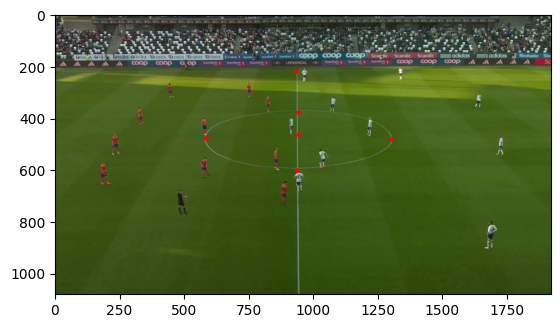

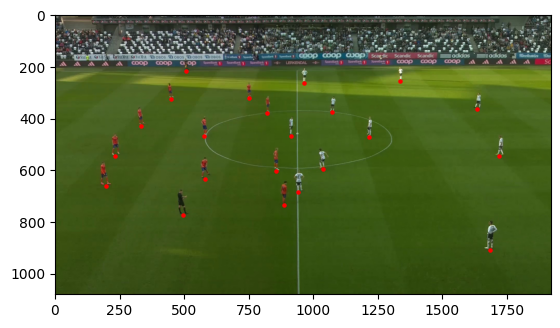

detected labels src [[ 940  374]
 [ 938  597]
 [ 939  460]
 [1299  478]
 [ 584  475]
 [ 934  217]]
detected labels dst [[457 230]
 [457 368]
 [457 295]
 [387 295]
 [530 295]
 [457  30]]
H [[   -0.83251      3.3801      1339.8]
 [   0.065167      5.1683     -1095.5]
 [ 0.00025375   0.0073565           1]]
pred_dest_keypoints [[      456.5      225.24]
 [      457.7      364.32]
 [     457.11      290.57]
 [     386.71      301.19]
 [     529.69      301.02]
 [     457.29      30.658]]
pred_player_points [[     519.91      430.26]
 [      577.2      394.04]
 [     457.18      398.72]
 [     371.05      457.24]
 [     440.97      363.05]
 [     506.89      172.39]
 [      516.1      381.09]
 [     592.62      268.62]
 [     590.13       172.1]
 [     448.64      98.526]
 [      465.5      416.49]
 [     321.79      336.76]
 [     589.47      342.34]
 [     462.37      294.74]
 [     532.16      296.03]
 [     425.16      226.78]
 [     484.51      229.41]
 [     402.45      296.57]
 [    

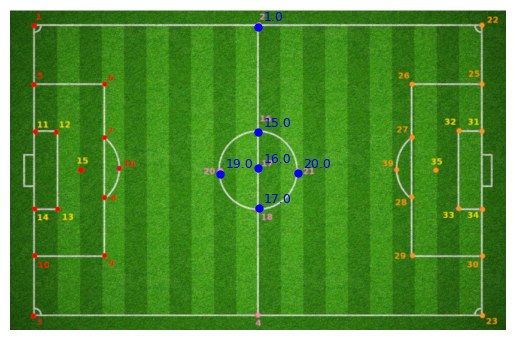

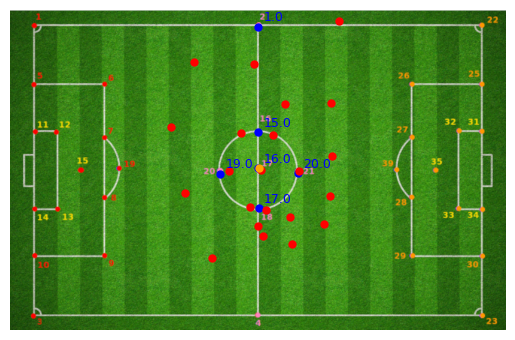

In [68]:
# Keypoint mapping
import pandas as pd

model_players = YOLO('/work/mbergst/TDT4265_Project/runs/detect/player/train4/weights/best.pt')
model_ball = YOLO('/work/mbergst/TDT4265_Project/runs/detect/ball/train3/weights/best.pt')

print("Known coordinates of each keypoint on pitch:")
display(pd.DataFrame(keypoints, index = ['x', 'y']))

# Initialize frame numbers
frame_number = 0

keypoints_displ_mean_tol = 10

keypoints_model_confidence_treshold = 0.5

# Iterate over each frame and use the track method


for frame in frame_paths[:1] :
    frame_number += 1
    for result_keyp, result_player, result_ball in zip(model.track(frame), model_players.track(frame), model_ball.track(frame)):
        bboxes_keyp = result_keyp.boxes.xyxy.cpu().numpy()
        bboxes_keyp_c = result_keyp.boxes.xywh.cpu().numpy()
        labels_keyp = list(result_keyp.boxes.cls.cpu().numpy())

        bboxes_player = result_player.boxes.xyxy.cpu().numpy()
        bboxes_player_c = result_player.boxes.xywh.cpu().numpy()
        labels_player = list(result_player.boxes.cls.cpu().numpy())
        

        bboxes_ball = result_ball.boxes.xyxy.cpu().numpy()
        bboxes_ball_c = result_ball.boxes.xywh.cpu().numpy()
        labels_ball = list(result_ball.boxes.cls.cpu().numpy())

        # Detected labels source points
        detected_labels_src = np.array([list(np.round(bboxes_keyp_c[i][:2]).astype(int)) for i in range(bboxes_keyp_c.shape[0])])
        image = Image.open('/work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/train/000001.jpg')
        plt.imshow(image)
        for keypoint in detected_labels_src:
            plt.scatter(keypoint[0], keypoint[1], color='red', s=5)
        plt.show()

        # Detected labels destination points
        detected_labels_dst = np.array([keypoints[i +1] for i in labels_keyp])

        bboxes_player_c_0 = bboxes_player_c[[i==0 for i in labels_player]]

        # Get coordinates of detected players as x_center, y_center + h/2
        # detected_player_src = bboxes_player_c[:, :2] + bboxes_player_c[:, 2:] / 2
        detected_player_src = bboxes_player_c[:, :2] + np.array([[0]*bboxes_player_c_0.shape[0], bboxes_player_c_0[:, 3] / 2]).T
        # plot player points on frame
        image = Image.open('/work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/1_train-val_1min_aalesund_from_start/images/train/000001.jpg')
        plt.imshow(image)
        for player in detected_player_src:
            plt.scatter(player[0], player[1], color='red', s=5)
        plt.show()


        # Get coordinates of detected ball as x_center, y_center
        detected_ball_src = bboxes_ball_c[0, :2] if len(bboxes_ball_c) > 0 else []

        print("detected labels src", detected_labels_src)
        print("detected labels dst", detected_labels_dst)
        # Calculate homography transformation matrix if more than 3 keypoints are detected
        if len(detected_labels_src) > 3:
            H, _ = cv2.findHomography(detected_labels_src, detected_labels_dst)
            print("H", H)

            # Transform keypoint coordinates from fram to pitch.png using calculated homography matrix
            # pred_dst_pts = cv2.perspectiveTransform(np.array([bboxes_keyp_c[:, :2]]), H).squeeze()

            pred_dest_keypoints = []
            for pt in detected_labels_src:
                pt = np.append(np.array(pt), np.array([1]), axis=0) 
                dest_point = np.matmul(H, np.transpose(pt))
                dest_point = dest_point / dest_point[2]
                pred_dest_keypoints.append(list(np.transpose(dest_point)[:2]))
            pred_dest_keypoints = np.array(pred_dest_keypoints)

            print("pred_dest_keypoints", pred_dest_keypoints)

            pred_player_points = []
            for pt in detected_player_src:
                pt = np.append(np.array(pt), np.array([1]), axis=0) 
                dest_point = np.matmul(H, np.transpose(pt))
                dest_point = dest_point / dest_point[2]
                pred_player_points.append(list(np.transpose(dest_point)[:2]))
            pred_player_points = np.array(pred_player_points)

            print("pred_player_points", pred_player_points)

            if detected_ball_src is not None:
                pt = np.append(np.array(detected_ball_src), np.array([1]), axis=0) 
                dest_point = np.matmul(H, np.transpose(pt))
                dest_point = dest_point / dest_point[2]
                detected_ball_dst = np.transpose(dest_point)
        

            print("detected_ball_dst", detected_ball_dst)
            
            # Beregner de transformerte punktene
            # pred_dest_keypoints = []
            # for pt in detected_labels_src:
            #     homog_pt = np.append(pt, 1)  # Gjør punktet homogent
            #     transformed_pt = np.dot(H, homog_pt)  # Utfører matrisemultiplikasjon
            #     transformed_pt = transformed_pt / transformed_pt[2]  # Normaliserer for å få tilbake til kartesiske koordinater
            #     pred_dest_keypoints.append(transformed_pt[:2])  # Lagrer de transformerte punktene uten den homogene koordinaten

            # pred_dest_keypoints = np.array(pred_dest_keypoints)

            # # Skriv ut de transformerte punktene
            # print("Transformerte keypoints:")
            # print(pred_dest_keypoints)
            # print("keyp labels", labels_keyp)



            
            
            
            # Draw keypoints on pitch
            plot_keypoints_on_image('pitch.png', pred_dest_keypoints, labels_keyp)
            
            # Draw keypoints, players and ball on pitch
            plot_pred_on_image('pitch.png', pred_dest_keypoints, labels_keyp, pred_player_points, detected_ball_dst)
        
        
        else:
            print("Not enough keypoints detected for homography calculation in frame", frame_number)
            continue

        



#box_1 = bboxes_keyp[0]
# #Check attributes of the first box
#print("Box 1 attributes:")
#print(f"Box 1 coordinates: {box_1[:4]}")
# print("COnf", box_1.conf)
# print("Number of detected keypoints in frame 1: ", len(bboxes))
# print("Detected keypoints in frame 1: ", bboxes)
        



In [65]:
import numpy as np

# Anta at H er definert som følger:
H = np.array([
    [-0.41558,     0.01178,      385.65],
    [-0.31744,   0.0081165,      294.76],
    [-0.001075, 2.4567e-05,           1]
])

# Testpunkter '
src_pt = np.array([
    [940, 374],
    [938, 597],
    [939, 460],
    [1299, 478],
    [584, 475],
    [934, 217]
])

# Legg til en rad med enere for å gjøre punktene homogene
src_pt = np.concatenate([src_pt, np.ones((src_pt.shape[0], 1))], axis=1)

# Utfør transformasjonen
dst_pt = np.matmul(H, src_pt.T)
dst_pt = dst_pt / dst_pt[2]

print("Transformerte punkter:")
print(dst_pt)




Transformerte punkter:
[[     449.32      454.15      447.37      386.18      386.97      42.575]
 [     455.83      292.38      222.53      295.61      294.97       25.23]
 [          1           1           1           1           1           1]]
